# ISEL - CPS 
## Semestre 2022/23
# <br>
###  <center> Trabalho Prático 1 </center>
# </br>


Trabalho realizado por:
* Bárbara Jesus, numero <b> 45108 </b>
* João Fernandes, numero <b> 47478 </b>
* Duarte Afonso, numero <b> 47736 </b>

<b> Turma L33D - Docente Michele Mengucci</b>
 


A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

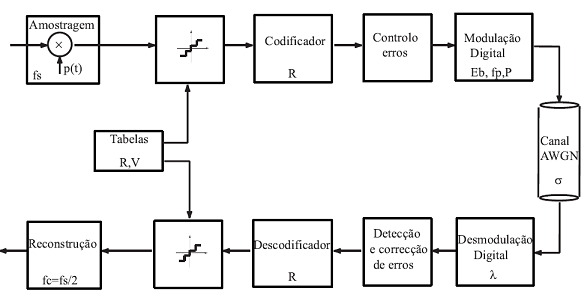

O 1º trabalho foca os blocos Quantificação/ Desquantificação do sinal e Códigos Detectores e Correctores de Erros. 

Além disso inclui uma revisão teórica da Amostragem e Reconstrução.




# A. Amostragem

1. Considere o sinal $x(t) = 20000 cos(2\pi 5025 t) + 10000 sin(2\pi 2507 t)$. Estude o sinal teoricamente. Apresente a expressão do espetro do sinal e represente numa figura o espectro de Amplitude e de Fase do sinal.


2. Gere o sinal $x(t)$ usando o Python. Considere o intervalo de tempo $0 < t < 1\,ms$, e a frequência de amostragem de 48KHz. Apresente numa figura o sinal no domínio do tempo e noutra figura o seu espetro de amplitude.


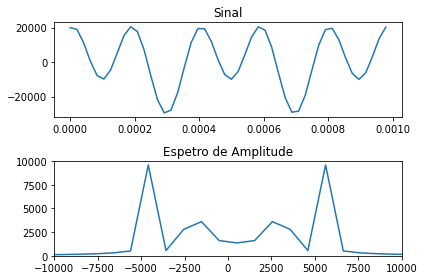

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 48000
Ts = 1 / fs

t = np.arange(0, 0.001, Ts)

# x = 20000 * np.cos(2 * np.pi * 5025 * t) + 10000 * np.sin(2 * np.pi * 2507 * t)
x = 20000 * np.cos(2 * np.pi * 5025 * t) + 10000 * np.cos(2 * np.pi * 2507 * t - np.pi / 2)

#representação do sinal no dominio do tempo
plt.subplot(2, 1, 1)
plt.title("Sinal")
plt.plot(t, x)

#representação do espetro de amplitude
X = np.fft.fft(x) / len(x)
X = np.fft.fftshift(X)
X = np.abs(X)
freq = np.linspace(-fs/2, fs/2, len(x))

plt.subplot(2, 1, 2)
plt.title("Espetro de Amplitude")
plt.axis([-10000, 10000, 0, 10000])
plt.plot(freq, X)

plt.tight_layout()

3. Admitindo que faz a amostragem do sinal com uma frequência $f_s = 8kHz$, represente o espectro do sinal amostrado. Comente os resultados apresentados.

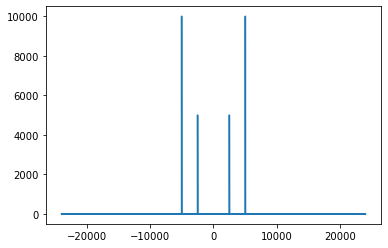

In [2]:
import numpy as np
import matplotlib.pyplot as plt

'''fs = 8000
Ts = 1 / fs

t = np.arange(0, 1, Ts) #alterado de 1ms para 1s'''

#x = 20000 * np.cos(2 * np.pi * 5025 * t) + 10000 * np.cos(2 * np.pi * 2507 * t - np.pi / 2)

#representação do espetro de amplitude
#X = np.fft.fft(x) / len(x)
#X = np.fft.fftshift(X)
#X = np.abs(X)
#freq = np.linspace(-fs/2, fs/2, len(x))

#plt.plot(freq, X)



fs = 48000 # Frequencia de amostragem
Ts = 1 / fs # Periodo de amostragem
t = 1 # Intervalo de tempo

ti = np.arange(0, t, Ts)

x = 20000 * np.cos(2 * np.pi * 5025 * ti) + 10000 * np.cos(2 * np.pi * 2507 * ti - np.pi / 2)

X1 = np.fft.fft(x) / len(x)
freq = np.fft.fftfreq(len(x), Ts)
Amplitude = np.abs(X1)

plt.plot(freq, Amplitude)

# B. Quantificação

4. Construa uma função em Python que crie as tabelas com os valores de decisão e valores de quantificação para um quantificador uniforme. 

    Esta função tem como parâmetros de entrada o número de bits por amostra (R), o valor máximo a quantificar (Vmax) e o tipo de quantificador (midrse ou midtread). Como parâmetros de saída deve devolver dois Numpy arrays com valores de quantificação e os valores de decisão.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def Quantific(R,Vmax,Qtype):
    
    L = 2**R #Níveis de quantificação
    deltaQ = (2*Vmax)/L #Intervalo de quantificalção
    
    if Qtype == 'midrise':
        Dq = np.arange(-Vmax, Vmax+deltaQ, deltaQ)
        Vq = np.arange(-Vmax+(deltaQ/2), Vmax, deltaQ)
    
    elif Qtype == 'midtread':
        Dq = np.arange(-Vmax+(deltaQ/2), Vmax, deltaQ)
        Vq = np.arange(-Vmax, Vmax+deltaQ, deltaQ)
    
    return Vq, Dq

## Verifique se a sua implementação
Realize um conjunto de testes unitários. Admita que $R=3$ e $Vmax=1$, para uma quantificação midtread.
* use uma lista de valores (poucos para conseguir validar manualmente)
* use uma arange entre -Vmax e Vmax

In [4]:
Vq, Dq = Quantific(3,1,'midtread')
print('midtread')
print("Vq: ", Vq)
print("Dq: ",Dq)
Vq, Dq = Quantific(3,1,'midrise')
print('midrise')
print("Vq: ",Vq)
print("Dq: ",Dq)

midtread
Vq:  [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]
Dq:  [-0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625  0.875]
midrise
Vq:  [-0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625  0.875]
Dq:  [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]


## Implemente o quantificador

Implemente uma função que realize a quantificação


In [5]:
# Função que implementa o Quantificador
# in: 
# x - sinal com amostras (nao quantificadas)
# Vq, Dq - valores de quantificação e valores de decisão
# out: 
# xq - sinal quantificado
# iq - indices do sinal quantificado
# prototipo da função
# xq, iq = Quantificador(x, Vq, Dq)
def Quantificador(x, Vq, Dq):
    xq = []
    iq = []

    for n in range(len(x)):
        for val in range(len(Dq)):
            if x[n] <= Dq[val]:
                if val == 0:
                    xq.append(Vq[val])
                    iq.append(val)
                else:
                    xq.append(Vq[val-1])
                    iq.append(val-1)
                break
    return xq, iq

## Use uma função sinusoidal e represente o sinal original, quantificado e o sinal de erro

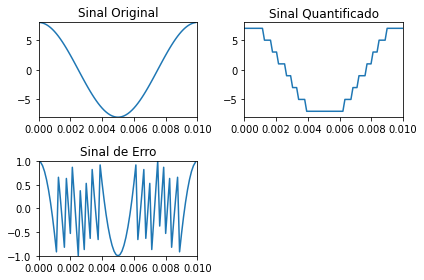

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

fs = 8000
Ts = 1 / fs
t = np.arange(0, 0.01, Ts)
x = 8 * np.cos(2 * np.pi * 100 * t)

Vq, Dq = Quantific(3,8,'midrise')
xq, iq = Quantificador(x, Vq, Dq)
xe = x-xq

t2 = np.linspace(0, 0.01, len(xq))

plot1 = plt.subplot2grid((4, 4), (0, 0),  rowspan=2, colspan=2)
plot1.set_title("Sinal Original")
plot1.axis([0, 0.01, -8, 8])
plot1.plot(t, x)

plot2 = plt.subplot2grid((4, 4), (0, 2), rowspan=2, colspan=2)
plot2.set_title("Sinal Quantificado")
plot2.axis([0, 0.01, -8, 8])
plot2.plot(t2, xq)

plot3 = plt.subplot2grid((4, 4), (2, 0), rowspan=2, colspan=2)
plot3.set_title("Sinal de Erro")
plot3.axis([0, 0.01, -1, 1])
plot3.plot(t, xe)

plt.tight_layout()
plt.show()

Represente o histograma do sinal de erro. Comente os resultados.

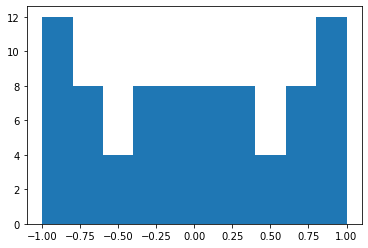

In [7]:
plt.hist(xe)
plt.show()

## SNR

Crie uma função que meça o SNR prático, ou seja, medindo a potência do sinal e a potência do sinal de erro.


In [8]:
def Measure_SNRp(x,xq):
    erro = x-xq
    
    SNRp = 10 * np.log10(np.sum(x**2)/np.sum(erro**2))

    return SNRp

Measure_SNRp(x, xq)

19.069935280762394

Crie uma função que calcule o SNR para o caso da quantificação uniforme.

$SNRt_{dB}= 6,02 \times N_b + 10 \log_{10} \frac{3 P_x}{V_{max}}$

In [9]:
def Measure_SNRt(R,Vmax,P):
    
    SNRtdb = 6.02 * R + 10*np.log10((3*P)/Vmax)

    return SNRtdb

Measure_SNRt(3, 10, 61.54)

30.72278746631102

## Testes
Considere o sinal de rampa já implementado.
Realize a quantificação do sinal x(t) para cada valor de R={3,4,5,6,7,8}.
Meça a SNR prática e o valor teórico. 
Construa um gráfico com ambos os valores da SNR teórica e medida em função do número de bits R. Comente os resultados.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fs = 48000
Ts = 1 / fs

t = np.arange(0, 0.01, Ts)

x = 20000 * np.cos(2 * np.pi * 5025 * t) + 10000 * np.cos(2 * np.pi * 2507 * t - np.pi / 2)

Vq3, Dq3 = Quantific(3,5000,'midrise')
xq3, iq3 = Quantificador(x, Vq3, Dq3)
arr[0] = Measure_SNRp(x, xq3)

Vq4, Dq4 = Quantific(4,5000,'midrise')
xq4, iq4 = Quantificador(x, Vq4, Dq4)
arr[1] = Measure_SNRp(x, xq4)

Vq5, Dq5 = Quantific(5,5000,'midrise')
xq5, iq5 = Quantificador(x, Vq5, Dq5)
arr[2] = Measure_SNRp(x, xq5)

Vq6, Dq6 = Quantific(6,5000,'midrise')
xq6, iq6 = Quantificador(x, Vq6, Dq6)
arr[3] = Measure_SNRp(x, xq6)

Vq7, Dq7 = Quantific(7,5000,'midrise')
xq7, iq7 = Quantificador(x, Vq, Dq7)
arr[4] = Measure_SNRp(x, xq7)

Vq8, Dq8 = Quantific(8,5000,'midrise')
xq8, iq8 = Quantificador(x, Vq8, Dq8)
arr[5] = Measure_SNRp(x, xq8)

ValueError: operands could not be broadcast together with shapes (480,) (271,) 

## Testes com voz
Grave um sinal de voz através do microfone com aproximadamente um segundo de duração. Faça a quantifição do sinal para cada valor de R={3,4,5,6,7,8}. Meça a SNR prática e o valor teórico (para determinar a potência no caso teórico deve usar o mesmo valor que na prática). Construa um gráfico com ambos os valores da SNR teórica e SNR medida em função do número de bits R. Comente os resultados

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

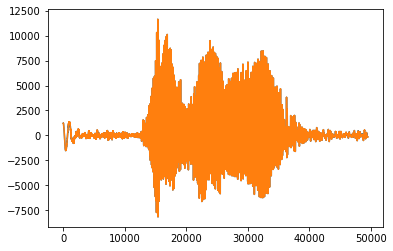

In [12]:
import scipy.io.wavfile as wav
fs, data = wav.read("uau.wav")
plt.plot(data)
data

Vq, Dq = Quantific(3,8,'midrise')
xq, iq = Quantificador(data, Vq, Dq)

Realize a quantificação do sinal de voz para cada valor de R={3,4,5,6,7,8}. Meça a SNR prática e o valor teórico (para determinar a potência no caso teórico deve usar o mesmo valor que na prática). Construa um gráfico com ambos os valores da SNR teórica e SNR medida em função do número de bits R. Comente os resultados.

## Imagem
Faça a leitura do ficheiro de imagem. Teste o código a baixo com vários valores de Q. Descreva o que produz o
código.

array([[ 77,  77,  77, ...,  69,  84, 111],
       [ 77,  77,  77, ...,  69,  84, 111],
       [ 77,  77,  77, ...,  69,  84, 111],
       ...,
       [196, 196, 189, ..., 135, 139, 141],
       [195, 195, 184, ..., 135, 134, 131],
       [195, 195, 184, ..., 135, 134, 131]], dtype=uint8)

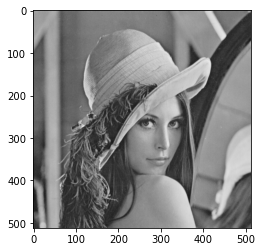

In [58]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
Q = 256
#im = Image.open("lena_color.tif")
im = Image.open("lena_gray.tif")
#type(im)
imq = im.quantize(Q)
#im.show()
plt.imshow(imq,cmap='gray')
#print(type(imq))
imagem = np.asarray(imq)
#print(imagem.shape)
imagem[:,:]

O método quantize() da biblioteca PIL faz com que a imagem apresente um determinado número de cores. Esse valor é passado como argumento à função e tem de ser um número compreendido entre 1 e 256.

In [59]:
np.max(imagem)

214

In [61]:
import cv2
image = cv2.imread("lena_color.tif")

In [63]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('testGray.tif', gray)

True

# C. Codificação/ Descodificação

Construa uma função Python que dado um Numpy array (com dimensão  𝑁 ) com valores inteiros, retorne um Numpy array (com dimensão  𝑁.𝑅×1 ) com os mesmos valores convertidos para binário. Esta função ainda deve receber como parâmetros de entrada o número de bits ( 𝑅 ) a usar na conversão de cada inteiro.

In [86]:
import numpy as np
import matplotlib.pyplot as plt

def Codific(arr_signal_quantized,R):

    arr_binary = []
    
    getbinary = lambda x, n: format(x, 'b').zfill(n)

    for value in range(len(arr_signal_quantized)):
        arr_binary.append(getbinary(arr_signal_quantized[value], R))   
        
    return arr_binary

a = [3, 5, 2, 3, 1]
arrayBin = Codific(a, 3)
print(arrayBin)

['00011', '00101', '00010', '00011', '00001']


Construa uma função que dado um Numpy array com valores os bits, faça a conversão para inteiros (considerando R bits).

In [89]:
def Descodific(arr_binary,R):
    
    arr_signal = []
    
    for value in range(len(arr_binary)):
        arr_signal.append(int(arr_binary[value], 2))   
    
    return arr_signal

arrayInt = Descodific(arrayBin, 3)
print(arrayInt)

[3, 5, 2, 3, 1]


Com base nas funções já implementadas, faça a codificação e descodificação PCM uniforme do sinal de áudio previamente gravado. Verifique qual a SNR obtida e ouça o sinal descodificado. Use para o efeito R=3, 5 e 8.

In [ ]:
#Resposta:

## Canal - O canal é modelado pelo modelo Binary Symmetric Channel [BSC](https://en.wikipedia.org/wiki/Binary_symmetric_channel)

Com as duas funções realizadas e admitindo que os restantes blocos do emissor, canal e receptor possam ser simulados pela expressão  𝑦=1∗𝑛𝑝.𝑙𝑜𝑔𝑖𝑐𝑎𝑙_𝑥𝑜𝑟(𝑥,𝑛𝑝.𝑟𝑎𝑛𝑑𝑜𝑚.𝑏𝑖𝑛𝑜𝑚𝑖𝑎𝑙(1,𝐵𝐸𝑅𝑡,𝑙𝑒𝑛(𝑥))) , onde  𝐵𝐸𝑅𝑡  contém o valor pretendido para o bit error rate.

Meça o BER antes e após a correcção de erros, para diferentes valores de  𝐵𝐸𝑅𝑡 .

In [ ]:
#x - array de bits a entrar no canal
#y - array de bits a sair do canal


Considere o sinal de áudio previamente gravado. Meça SNR na recepção e o BER, para diferentes valores de 𝐵𝐸𝑅𝑡 . (considera-se que o ruído é a diferença entre o sinal à entrada do transmissor e o sinal à saída do receptor); Comente os resultados obtidos.

# D.  Deteção e Correção de erros 

Deteção e Correção de erros
Construa uma função que implemente o Hamming(7,4). Utilize a seguinte matriz geradora:

In [90]:
import numpy as np
G=np.array([[1,0,0,0,1,1,0],[0,1,0,0,1,0,1],[0,0,1,0,0,1,1],[0,0,0,1,1,1,1]])
print(G)

[[1 0 0 0 1 1 0]
 [0 1 0 0 1 0 1]
 [0 0 1 0 0 1 1]
 [0 0 0 1 1 1 1]]


In [91]:
import numpy as np
import matplotlib.pyplot as plt

def Hamming_7_4(arr_bits):
    
    return arr_binary

Construa uma função que dado um Numpy array M bits, para cada 8 bits detecte e corriga possíveis erros, sendo o resultado 4 bits de mensagem.

In [ ]:
def Detetor(arr_binary):
    #resposta
    return arr_bits

Faça um conjunto de testes para verificar o correto funcionamento das funções.

Considere o sinal de áudio previamente gravado. Meça SNR na recepção e o BER após a correcção de erros, para diferentes valores de 𝐵𝐸𝑅𝑡 . (considera-se que o ruído é a diferença entre o sinal à entrada do transmissor e o sinal à saída do receptor); Comente os resultados obtidos.